In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Importing the dataset

In [2]:
column_name = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist',
               'class']
dataset = pd.read_csv('magic04.data', names=column_name)
dataset

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


# Exploratory Data Analysis

In [3]:
dataset['class'].value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

# balancing the dataset

In [4]:
g = dataset.groupby('class')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
g

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
class                                                                       
g     0      30.7580  18.8554  2.7600  0.3162  0.1590  -44.0666  -20.7419   
      1      39.0881  27.0886  2.9393  0.2944  0.1639   18.6492  -26.6065   
      2      91.2979  51.3509  3.9785  0.1350  0.0760  -89.8026   39.1916   
      3      55.4407  23.4394  2.8106  0.2939  0.1601   59.6760   51.0740   
      4      71.4461  19.1675  3.0430  0.2255  0.1164   59.4336   63.4758   
...              ...      ...     ...     ...     ...       ...       ...   
h     6683  240.9400  54.7317  3.5379  0.0977  0.0500 -174.7560 -252.5760   
      6684   29.6989  10.8918  2.2122  0.5565  0.2925   -0.5062   14.8697   
      6685  110.0000  28.8437  3.2674  0.2431  0.1510  -79.1003   36.8558   
      6686  126.4423  67.4753  3.9310  0.0884  0.0557   14.1680   61.4354   
      6687   17.3544   7.4476  2.1629  0.7904  0.5533   -0.8759   -2.5983   

            fM3Trans   fAlpha     fDist class  
class                                          
g     0     -17.1130   0.5636  110.6370     g  
      1      23.9323  43.0747   76.7265     g  
      2      26.0257   2.0070  391.2630     g  
      3       8.5967   5.0350  256.8960     g  
      4       9.6581   6.2520  197.9280     g  
...              ...      ...       ...   ...  
h     6683  -42.4076   1.0760  210.0680     h  
      6684   -5.8006  88.1524  225.8803     h  
      6685  -18.6221   7.3746  322.9150     h  
      6686   40.3912  67.0214  318.6719     h  
      6687    4.5218  42.2314  170.7840     h  

[13376 rows x 11 columns]

# splitting the dataset into y and x

In [5]:
X = g.iloc[:, :-1].values
y = g.iloc[:, -1].values

In [6]:
X

array([[ 30.758 ,  18.8554,   2.76  , ..., -17.113 ,   0.5636, 110.637 ],
       [ 39.0881,  27.0886,   2.9393, ...,  23.9323,  43.0747,  76.7265],
       [ 91.2979,  51.3509,   3.9785, ...,  26.0257,   2.007 , 391.263 ],
       ...,
       [110.    ,  28.8437,   3.2674, ..., -18.6221,   7.3746, 322.915 ],
       [126.4423,  67.4753,   3.931 , ...,  40.3912,  67.0214, 318.6719],
       [ 17.3544,   7.4476,   2.1629, ...,   4.5218,  42.2314, 170.784 ]])

In [7]:
y

array(['g', 'g', 'g', ..., 'h', 'h', 'h'], dtype=object)

# Encoding categorical data

In [8]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
y = e.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

# normalizing the dataset

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.56583109, -0.23071073, -0.17157511, ..., -0.74674031,
        -1.14389452, -1.10254146],
       [-0.38872381,  0.16392272,  0.20537847, ...,  1.02414029,
         0.42906076, -1.54402142],
       [ 0.72131516,  1.3268624 ,  2.3901535 , ...,  1.11445908,
        -1.0904872 ,  2.55092141],
       ...,
       [ 1.11894281,  0.24804811,  0.89516359, ..., -0.81184974,
        -0.89188037,  1.66110051],
       [ 1.46852457,  2.09973656,  2.29029129, ...,  1.73425197,
         1.31511377,  1.6058597 ],
       [-0.85080668, -0.77750898, -1.42689571, ...,  0.18668319,
         0.39785778, -0.31948917]])

# splitting the dataset into training, validation and testing

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=True)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.50, train_size=0.50,
                                                              random_state=True)

# fitting the model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.7972097658196313


In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
accuracy_validation= classifier.score(X_test, y_test)
print(accuracy_validation)

0.7801595214356929


# apply different values of k and choose the best one using cross validation

In [13]:
from sklearn.model_selection import GridSearchCV
KN = KNeighborsClassifier()
k_range = list(range(1, 26,2))
param_grid = dict(n_neighbors=k_range)
grid=GridSearchCV(KN,param_grid,cv=10,scoring='accuracy',return_train_score=True)
g=grid.fit(X_train,y_train)

#get the best value of k

In [14]:
print(grid.best_params_)
accuracy=grid.best_score_*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )


{'n_neighbors': 13}
Accuracy for our training dataset with tuning is : 80.80%


# apply the best value of k on the test dataset

In [15]:
knn=KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn.fit(X_train,y_train)
y_test_pred=knn.predict(X_test)
test_accuracy=knn.score(X_test,y_test)
print(test_accuracy)

0.8126557050323866


# apply the best value of k on the validation dataset

In [16]:
knn=KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn.fit(X_train,y_train)
y_validation_pred=knn.predict(X_validation)
test_accuracy=knn.score(X_validation,y_validation)
print(test_accuracy)

0.8060817547357926


# plotting the confusion matrix and classification report

[[855 121]
 [255 776]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       976
           1       0.87      0.75      0.80      1031

    accuracy                           0.81      2007
   macro avg       0.82      0.81      0.81      2007
weighted avg       0.82      0.81      0.81      2007


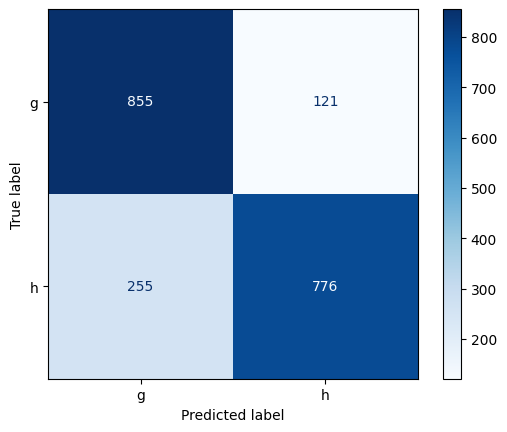

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_test_pred)
print(cm)
print(classification_report(y_test,y_test_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['g','h'])
disp = disp.plot(cmap=plt.cm.Blues)

# comparing the results of the model with and without tuning

In [18]:
results = pd.DataFrame(g.cv_results_)
needed_results=results[['param_n_neighbors','mean_train_score','mean_test_score']]
needed_results

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.781587
1,3,0.890527,0.796861
2,5,0.862034,0.804123
3,7,0.851270,0.806686
4,9,0.843497,0.806793
5,11,0.836626,0.806261
6,13,0.832722,0.807968
7,15,0.829281,0.805833
8,17,0.826777,0.805832
9,19,0.825210,0.805404
